<br>
<img src="../static/logo.jpg" alt="Team Blue" style="width: 500px;"/>

# Image Classification - Deep Learning with Tensorflow
---

In [2]:
#Importing dataset with all pictures (as arrays) from Keras
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

### Checking shapes

In [3]:
#Looking at the shapes X and y for both the training and the test set.
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
X_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


#### X_train: 50000 images/rows, images size= 32x32px , 3=RGB
#### y_train: 50000 rows and one column with the corresponding class to X_train
#### X_test: 10000 images/rows, images size= 32x32px , 3=RGB
#### y_train: 50000 rows and one column with the corresponding class to X_test

Label nr = [9]


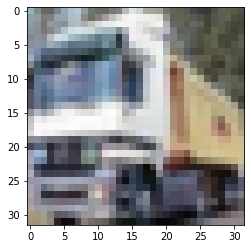

In [4]:
#Verifying one image from X_train with the corresponding class/label from y_train
import matplotlib.pyplot as plt
label = 1
img = plt.imshow(X_train[label])
print(f"Label nr = {y_train[label]}")

<h3>Label numbers</h3>

<table style="float: left;"> 
<tr>
    <th scope="row">Airplane</th><td>0</td>        
</tr>   
<tr>
    <th scope="row">Car</th><td>1</td>        
</tr>  
<tr>
   <th scope="row">Bird</th><td>2</td>         
</tr>
<tr>
   <th scope="row">Cat</th><td>3</td>         
</tr>
<tr>
   <th scope="row">Deer</th><td>4</td>         
</tr>
<tr>
   <th scope="row">Dog</th><td>5</td>         
</tr>
<tr>
   <th scope="row">Frog</th><td>6</td>         
</tr>
<tr>
   <th scope="row">Horse</th><td>7</td>         
</tr>
<tr>
   <th scope="row">Ship</th><td>8</td>         
</tr>
<tr>
   <th scope="row">Truck</th><td>9</td>         
</tr>    

In [5]:
#Converting/one-hot encoding y_train and y_test from 1 column with labels 0-9
#
import keras
y_train_one_hot = keras.utils.to_categorical(y_train, 10)
y_test_one_hot = keras.utils.to_categorical(y_test, 10)
#Printing y_train before one-hot encoding
print('Before one-hot encoding')
y_train[:10]

Before one-hot encoding


array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3]], dtype=uint8)

In [6]:
#Printing y_train after one-hot encoding (now called y_train_one_hot)
#Every label now has its own column with value 0 or 1.
#All columns/labels will be 0 except for one that will have the value 1.
#We can see here that the first row has nr 1 on index position 6
#This means that the first row/image should be a Frog.
print('After one-hot encoding')
y_train_one_hot[:10]

After one-hot encoding


array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [7]:
#Converting X from int to float and then divide by 255.
#This is to convert the RGB range from 0-255 to range 0-1.
#ex. 100=0.3921, 200=0.7843, 0=0, 255=1.0  etc. 
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255
X_test = X_test / 255

In [8]:
#Printing the values of the first pixel in the second image (the truck from earlier) 
#to see the converted RGB values
X_train[1][0][0]

array([0.6039216 , 0.69411767, 0.73333335], dtype=float32)

In [10]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

In [11]:
#Creating an empty instance of Sequential
model = Sequential()

In [13]:
#Adding Conv2D layer with 32 outputs/neurons and a 3x3 filter/kernel.
#We also define the input shape of the pictures, 32x32x3  (32x32=image resolution, 3 = RGB).
#Padding="same" to get a one pixel thick frame around each 32x32 shape.
#This way the filter will reach the side pixels and the output will be the
#same size/shape as the input (32x32). 
#Without this padding the output would be 30x30. (a loss of one pixel on each side of the 32x32 shape)
#Stride will be 1 as this is the default. This means the filter/kernel will step 1 pixel at a time to the right.
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32,32,3)))

In [14]:
#Adding another Conv2D layer. (Input shape is only necessary on the first layer)
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))

In [15]:
#Adding MaxPooling2D layer with pool size 2x2.
#Default stride is pool size so it will be 2.
#This means that it will step 2 pixels to the right so the pool
#will never overlap itself.
#Since each pool will select the highest value out of the 2x2 pool, 
#the ouput shape will be half the input shape (16x16)
model.add(MaxPooling2D(pool_size=(2, 2)))

In [16]:
#Adding Dropout layer.
#(randomly setting 25% of outgoing neurons to 0)
#This a technique to prevent overfitting.
model.add(Dropout(0.25))

In [17]:
#Adding another Conv2D layer. This time with 64 outputs/neruons.
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))

In [18]:
#One more lyaer of Conv2D
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))

In [ ]:
#Another MaxPooling layer with the same pool size.
model.add(MaxPooling2D(pool_size=(2, 2)))

In [70]:
#Another Dropout layer of 25%
model.add(Dropout(0.25))

In [71]:
#Adding a Flatten layer to make the shape flat (one row only)
model.add(Flatten())

In [72]:
#Adding Dense (fully connected) layer with 512 neurons.
model.add(Dense(512, activation='relu'))

In [73]:
#Adding another Dropout layer. This time 50%
model.add(Dropout(0.5))

In [74]:
#Last is a Dense (fully connected) layer with 10 neurons (same as the number of classes/labels that we have)
#Activation function is set to softmax to get probabilities outputs.
#All the 10 probabilities values will sum up to 1. (100%)
model.add(Dense(10, activation='softmax'))

In [75]:
#Printing a summary of all the added layers.
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        3

In [76]:
#Compiling the model. Using loss function Categorical Crossentropy
#because we have a classification of several classes.
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [78]:
#Training our model.
#We use 0.2 validation split 
#(20% of X_train and y_train is used for validation/test)
#(80% is used for training)
hist = model.fit(X_train, y_train_one_hot, 
           batch_size=32, epochs=20, 
           validation_split=0.2)

Epoch 1/20
1250/1250 [==============================] - 66s 53ms/step - loss: 1.6296 - accuracy: 0.3967 - val_loss: 1.2534 - val_accuracy: 0.5440
Epoch 2/20
1250/1250 [==============================] - 67s 54ms/step - loss: 1.2134 - accuracy: 0.5656 - val_loss: 1.0173 - val_accuracy: 0.6345
Epoch 3/20
1250/1250 [==============================] - 67s 54ms/step - loss: 1.0370 - accuracy: 0.6326 - val_loss: 0.9544 - val_accuracy: 0.6629
Epoch 4/20
1250/1250 [==============================] - 66s 53ms/step - loss: 0.9284 - accuracy: 0.6725 - val_loss: 0.8425 - val_accuracy: 0.7048
Epoch 5/20
1250/1250 [==============================] - 66s 53ms/step - loss: 0.8488 - accuracy: 0.7001 - val_loss: 0.8302 - val_accuracy: 0.7145
Epoch 6/20
1250/1250 [==============================] - 67s 54ms/step - loss: 0.7910 - accuracy: 0.7227 - val_loss: 0.7868 - val_accuracy: 0.7264
Epoch 7/20
1250/1250 [==============================] - 68s 54ms/step - loss: 0.7424 - accuracy: 0.7394 - val_loss: 0.7717 -

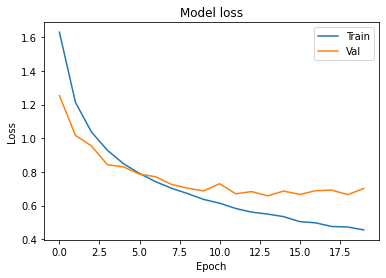

In [79]:
#Visualizing the loss from training 
#togheter with the loss from the validation
#for each epoch.
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [81]:
#Evaluating the model with out test data.
#The last epoch from our training had val_accuracy 0.7699
#The evaluation on unseen test images has 0.7649
#Looks like the model has a stable accuracy.
model.evaluate(X_test, y_test_one_hot)[1]

313/313 [==============================] - 4s 13ms/step - loss: 0.7380 - accuracy: 0.7649


0.7649000287055969

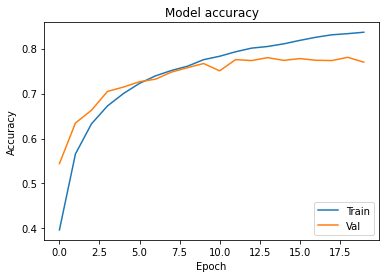

In [87]:
#Visualizing the accuracy from training 
#togheter with the accuracy from the validation
#for each epoch.
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [88]:
#Saving the trained model in the current directory
model.save('blue_img_predict_model.h5')

In [89]:
#Importing a previously saved model.
#from keras.models import load_model
#model = load_model('blue_img_predict_model.h5')

In [373]:
#Loading an image to test the model "manually".
my_image = plt.imread("ship.png")

In [374]:
#Resizing the image to match the image size of the training set.
from skimage.transform import resize
my_image_resized = resize(my_image, (32,32,3))

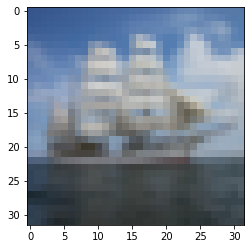

In [375]:
#Shows the resized image (resized to 32x32)
plt.imshow(my_image_resized)

In [376]:
#Predicting the class/label of the resized image using our model.
import numpy as np
probabilities = model.predict(np.array( [my_image_resized,] ))

In [377]:
#Printing the results from the prediction.
#Every column represents a class/label and the highest
#value is the class/label that the model has predicted as "most likely".
probabilities

array([[4.3498552e-05, 1.8011310e-08, 2.0673468e-05, 8.6178648e-07,
        2.8446344e-08, 9.5970769e-09, 2.1330724e-04, 1.0913409e-09,
        9.9972147e-01, 1.1881708e-07]], dtype=float32)

In [378]:
#Prints the top 5 most likely classes/labels.
number_to_class = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
index = np.argsort(probabilities[0,:])
print("Most likely class:", number_to_class[index[9]], "-- Probability:", probabilities[0,index[9]])
print("Second most likely class:", number_to_class[index[8]], "-- Probability:", probabilities[0,index[8]])
print("Third most likely class:", number_to_class[index[7]], "-- Probability:", probabilities[0,index[7]])
print("Fourth most likely class:", number_to_class[index[6]], "-- Probability:", probabilities[0,index[6]])
print("Fifth most likely class:", number_to_class[index[5]], "-- Probability:", probabilities[0,index[5]])

Most likely class: ship -- Probability: 0.99972147
Second most likely class: frog -- Probability: 0.00021330724
Third most likely class: airplane -- Probability: 4.3498552e-05
Fourth most likely class: bird -- Probability: 2.0673468e-05
Fifth most likely class: cat -- Probability: 8.617865e-07
